# Task 1 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [99]:
df = pd.read_csv(r'C:\Users\sebas\Desktop\heart.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
X = df.loc[:,df.columns!="target"]
type(X)

y = df["target"]
type(y)

pandas.core.series.Series

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

In [111]:
from sklearn import svm
clf_svm_1 = svm.SVC(kernel='linear', C=100)
clf_svm_1.fit(X_train_std, y_train)

SVC(C=100, kernel='linear')

In [112]:
y_train_pred = clf_svm_1.predict(X_train_std)
y_test_pred = clf_svm_1.predict(X_test_std)

In [113]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Model Accuracy

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [115]:
confusion_matrix(y_test, y_test_pred)

array([[26,  3],
       [ 4, 28]], dtype=int64)

In [147]:
CM = confusion_matrix(y_test, y_test_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print(" TN " +str(TN), " TP " + str(TP), " FN "+ str(FN), " FP "+str(FP))

 TN 21  TP 26  FN 6  FP 8


In [151]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TPR)

0.8125


In [118]:
accuracy_score(y_test,y_test_pred)

0.8852459016393442

In [68]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [69]:
clf_svm_1.n_support_

array([55, 54])

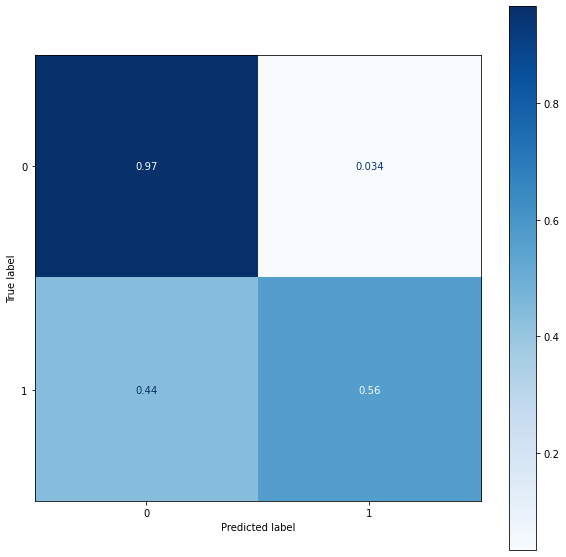

In [71]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_svm_1, X_test, y_test, normalize='true' ,cmap=plt.cm.Blues, ax=ax)


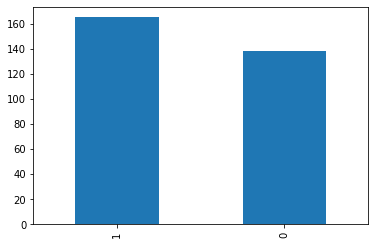

In [72]:
df.target.value_counts().plot.bar()

# Task 2, Grid Search. 
#### - With GridSearch we dont need to manually check every parameter which gives us the best accuracy

In [119]:
from sklearn.model_selection import GridSearchCV
params = {'C':(0.1,1,100)}
clf_svm_1=svm.SVC(kernel='linear')
svm_grid_lin=GridSearchCV(clf_svm_1, params, n_jobs=-1,
                         cv=10, verbose=1, scoring='accuracy')

In [120]:
svm_grid_lin.fit(X_train_std, y_train)
svm_grid_lin.best_params_
linsvm_clf = svm_grid_lin.best_estimator_
accuracy_score(y_test, linsvm_clf.predict(X_test_std))

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished


0.8852459016393442

In [121]:
svm_grid_lin.best_params_

{'C': 100}

# Cross Validation for poly and rbf 

In [122]:
from sklearn.model_selection import GridSearchCV
params = {'C':(0.1,1,10,25,50,100)}
clf_svm_p3=svm.SVC(kernel='poly')
svm_grid_lin=GridSearchCV(clf_svm_p3, params, n_jobs=-1,
                         cv=10, verbose=1, scoring='accuracy')

In [123]:
svm_grid_lin.fit(X_train_std, y_train)
svm_grid_lin.best_params_
linsvm_clf = svm_grid_lin.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [124]:
svm_grid_lin.best_params_

{'C': 1}

In [125]:
from sklearn.model_selection import GridSearchCV
params = {'C':(0.1, 0.2, 1,10,25,50,100)}
clf_svm_r=svm.SVC(kernel='rbf')
svm_grid_lin=GridSearchCV(clf_svm_r, params, n_jobs=-1,
                         cv=10, verbose=1, scoring='accuracy')

In [126]:
svm_grid_lin.fit(X_train_std, y_train)
svm_grid_lin.best_params_
linsvm_clf = svm_grid_lin.best_estimator_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.1s finished


In [127]:
svm_grid_lin.best_params_

{'C': 1}

# Polynomial kernel

In [142]:
clf_svm_p3 = svm.SVC(kernel='poly', degree= 2, C= 1)
clf_svm_p3.fit(X_train_std, y_train)

SVC(C=1, degree=2, kernel='poly')

In [143]:
y_train_pred = clf_svm_p3.predict(X_train_std)
y_test_pred = clf_svm_p3.predict(X_test_std)

In [144]:
accuracy_score(y_test,y_test_pred)

0.7704918032786885

In [145]:
clf_svm_p3.n_support_

array([94, 95])

# RBF kernel

In [138]:
clf_svm_r = svm.SVC(kernel='rbf', gamma=0.5, C=1)
clf_svm_r.fit(X_train_std, y_train)

SVC(C=1, gamma=0.5)

In [139]:
y_train_pred = clf_svm_r.predict(X_train_std)
y_test_pred = clf_svm_r.predict(X_test_std)

In [140]:
accuracy_score(y_test, y_test_pred)

0.8360655737704918

In [141]:
clf_svm_r.n_support_

array([108, 126])